In [ ]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
pip install simplemma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 MB 10.8 MB/s eta 0:00:00


In [ ]:
from simplemma import simple_tokenizer
import seaborn as sns
import numpy as np
import pandas as pd
import string
import re
import nltk
import sklearn
from nltk.tokenize import RegexpTokenizer
from tensorflow import keras
from keras import layers
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import imblearn
from sklearn.model_selection import KFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import BorderlineSMOTE, SMOTE, ADASYN, SMOTENC, RandomOverSampler
from imblearn.under_sampling import (RandomUnderSampler,
                                    NearMiss,
                                    InstanceHardnessThreshold,
                                    CondensedNearestNeighbour,
                                    EditedNearestNeighbours,
                                    RepeatedEditedNearestNeighbours,
                                    AllKNN,
                                    NeighbourhoodCleaningRule,
                                    OneSidedSelection,
                                    TomekLinks)
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import make_pipeline
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer, precision_recall_fscore_support

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/datasets/noisy-shuf.txt"
dataframe1 = pd.read_csv(file_path, delimiter = "\t", header=None)
dataframe1.columns = ["id", "text", "sentiment"]


In [ ]:
pd.set_option("display.max.columns",None)
dataframe1.head()

,id,text,sentiment
0,12692,lieliski ja ir draugi kas uzsit uz pleca paldi...,POZ
1,11025,@aukstikalniss vēl ir tūliņ nebūs :),POZ
2,50100,@teuntagad man nav tv,NEG
3,50126,sēžu mājās :(( gribu uz skolu bet nevar:@,NEG
4,14608,varētu nokrāsot rozīgus matus bet dohhh 2dien ...,NEU


In [ ]:
dataframe1.shape[0]

4774

In [ ]:
df2 = pd.read_json("/content/drive/MyDrive/datasets/tweet_corpus.json")


In [ ]:
pd.set_option("display.max.columns",None)
df2.head()



,id,sentiment,text
0,8.518400e+17,POZ,Es šodien ļoti labi uzvedos! Varēju kārtīgi un...
1,8.518333e+17,POZ,"RT @katrinailjinska: Es pat teiktu, ka ļoti tr..."
2,8.518257e+17,NEU,@kajbumba @AgrisSuveizda @UStrautmanis Es esmu...
3,8.518196e+17,NEU,"@pulks @kajbumba Es gribētu ticēt,ka Lānss Ārm..."
4,8.517606e+17,NEU,"@AnnaUlla Es pieļauju, ka nebūs grūti atrast ļ..."


In [ ]:
columns_titles = ["id","text","sentiment"]
df2=df2.reindex(columns=columns_titles)

In [ ]:
df2.size

6816

In [ ]:
pd.set_option("display.max.columns",None)
df2.head()


,id,text,sentiment
0,8.518400e+17,Es šodien ļoti labi uzvedos! Varēju kārtīgi un...,POZ
1,8.518333e+17,"RT @katrinailjinska: Es pat teiktu, ka ļoti tr...",POZ
2,8.518257e+17,@kajbumba @AgrisSuveizda @UStrautmanis Es esmu...,NEU
3,8.518196e+17,"@pulks @kajbumba Es gribētu ticēt,ka Lānss Ārm...",NEU
4,8.517606e+17,"@AnnaUlla Es pieļauju, ka nebūs grūti atrast ļ...",NEU


In [ ]:
df4 = pd.read_json("/content/drive/MyDrive/datasets/tweet_corpus_fn.json", encoding="utf8")

ValueError: ignored

In [ ]:
df3 = pd.DataFrame()


In [ ]:
df3 = pd.concat([dataframe1,df2], axis=0)

In [ ]:
df3.shape

(7046, 3)

In [ ]:
dataframe1.shape


(4774, 3)

Text(0.5, 1.0, 'sentiment representationin dataset')

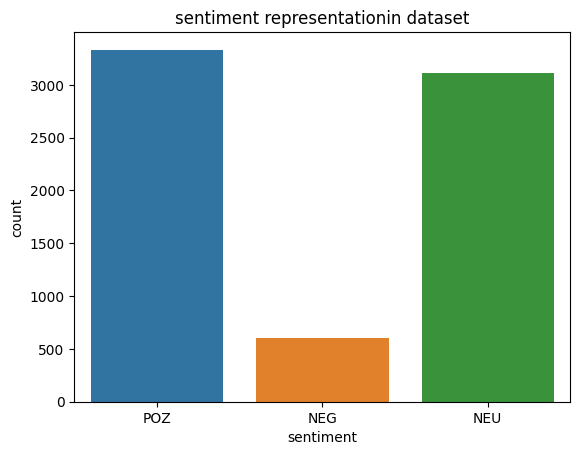

In [ ]:
sns.countplot(x='sentiment',data = df3)
plt.title('sentiment representationin dataset')

In [ ]:
#already cleaned once
def cleaner(tweet):
    tweet = re.sub(r'\d+', '', tweet) # remove numbers
    tweet = "".join([char.lower() for char in tweet if char not in string.punctuation])
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text

    return tweet
df3['text'] = df3['text'].map(lambda x: cleaner(x))
df3.to_csv('/content/drive/MyDrive/datasets/tweets.csv') #specify location

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/datasets/tweets.csv')

In [ ]:
pd.set_option("display.max.columns",None)
df3.head(8)

,Unnamed: 0,id,text,sentiment
0,0,12692.0,lieliski ja ir draugi kas uzsit uz pleca paldi...,POZ
1,1,11025.0,aukstikalniss vēl ir tūliņ nebūs,POZ
2,2,50100.0,teuntagad man nav tv,NEG
3,3,50126.0,sēžu mājās gribu uz skolu bet nevar,NEG
4,4,14608.0,varētu nokrāsot rozīgus matus bet dohhh dien d...,NEU
5,5,12626.0,šodien izšūpojos lāčos paskatījāmies dejotājus...,POZ
6,6,10546.0,tā kleita padara mani nedaudz tievāku un man t...,POZ
7,7,13837.0,draugiem lv runasvīrs zina kas vajadzīgs cilvē...,NEU


In [ ]:
df3.tail(8)

,Unnamed: 0,id,text,sentiment
7038,2264,5.817039e+17,agrie rīti lnt brokastīs httptcoofqtglo,NEU
7039,2265,5.814377e+17,jēga no manis tik pat liela kā no beigta sargsuņa,NEG
7040,2266,5.801053e+17,brīvība ir spēka pārbaudījums r blaumanis,NEU
7041,2267,5.793314e+17,kvartets kvartz valkā sirdspuksti aizvien max ...,NEU
7042,2268,5.788665e+17,leidīz workin hard sirdspuksti valka yolokvart...,NEU
7043,2269,5.787760e+17,maģija vēl turpinās sirdspuksti max vienoti va...,NEU
7044,2270,5.779219e+17,reizēm šķiet ka jūku prātā bet varbūt dzeru dz...,NEU
7045,2271,5.755701e+17,tas moments kad iznākot no dušas uzvelc tizlas...,NEU


In [ ]:
with open("/content/drive/MyDrive/datasets/stopwords.txt", "r") as f:
    new_stopwords = []
    for line in f.readlines():
        new_stopwords.append(line)
    stripped_line = [s.rstrip() for s in new_stopwords]


new_stopwords_set = set(stripped_line)

In [ ]:
print(new_stopwords_set)

{'tu', 'nebūt', 'vini', 'tāpēc', 'tādu', 'ko', 'nevienam', 'jeb', 'nekā', 'kā', 'citiem', 'ja', 'kopš', 'nedz', 'kļuvu', 'šaipus', 'vel', 'u', 'varējāt', 'pats', 'visur', 'taa', 'is', 'viņpus', 'esam', 'tās', 'cita', 'tiksim', 'maz', 'jebšu', 'viss', 'otrpus', 'tiek', 'bil', 'kas', 'būtu', 'c', 'bez', 'tiksiet', 'buus', 'tapšu', 'iz', 'pēc', 'starp', 'vot', 'to', 'tām', 'no', 'netiek', 'beta', 'tikšu', 'sev', 'varējām', 'tiem', 'visus', 'cik', 'viņai', 'o', 'ik', 'bilo', 'pašiem', 'ņ', 'da', 'priekš', 'visiem', 'tiku', 'citu', 'būsi', 'bit', 'the', 'ka', 'kādas', 'bija', 'kurā', 'jūsu', 'biji', 'utt', 'mums', 'šīs', 'šī', 'tam', 'pec', 'ī', 'tikko', 'biju', 'ģ', 'jums', 'viņi', 'zem', 'šai', 'pat', 'neko', 'tieku', 'neesmu', 'peec', 'varēja', 'tādus', 'pirms', 'tajā', 't', 'visas', 'būs', 'k', 'taču', 'nekas', 'jūs', 'mani', 'pati', 'būšu', 'and', 'tikām', 'bus', 'tiks', 'taps', 'š', 'viņiem', 'maza', 'caur', 'kada', 'nevis', 'tapsi', 'ar', 'kurus', 'sevi', 'vins', 'kļūsti', 'gan', 'va

In [ ]:
df3['text_wo_stopwords'] = df3['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (new_stopwords_set)]))

In [ ]:
 df3['tokenized_sents'] = df3.apply(lambda row: simple_tokenizer(row['text_wo_stopwords']), axis=1)


In [ ]:
df3.head(8)

,Unnamed: 0,id,text,sentiment,text_wo_stopwords,tokenized_sents
0,0,12692.0,lieliski ja ir draugi kas uzsit uz pleca paldi...,POZ,lieliski draugi uzsit pleca paldies marruciic ...,"[lieliski, draugi, uzsit, pleca, paldies, marr..."
1,1,11025.0,aukstikalniss vēl ir tūliņ nebūs,POZ,aukstikalniss tūliņ,"[aukstikalniss, tūliņ]"
2,2,50100.0,teuntagad man nav tv,NEG,teuntagad tv,"[teuntagad, tv]"
3,3,50126.0,sēžu mājās gribu uz skolu bet nevar,NEG,sēžu mājās gribu skolu nevar,"[sēžu, mājās, gribu, skolu, nevar]"
4,4,14608.0,varētu nokrāsot rozīgus matus bet dohhh dien d...,NEU,varētu nokrāsot rozīgus matus dohhh dien dejoš...,"[varētu, nokrāsot, rozīgus, matus, dohhh, dien..."
5,5,12626.0,šodien izšūpojos lāčos paskatījāmies dejotājus...,POZ,šodien izšūpojos lāčos paskatījāmies dejotājus...,"[šodien, izšūpojos, lāčos, paskatījāmies, dejo..."
6,6,10546.0,tā kleita padara mani nedaudz tievāku un man t...,POZ,kleita padara nedaudz tievāku patīk,"[kleita, padara, nedaudz, tievāku, patīk]"
7,7,13837.0,draugiem lv runasvīrs zina kas vajadzīgs cilvē...,NEU,draugiem lv runasvīrs zina vajadzīgs cilvēkam ...,"[draugiem, lv, runasvīrs, zina, vajadzīgs, cil..."


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
classes =df3['sentiment'].unique()

In [ ]:
df3['sentiment'].value_counts()

POZ    3332
NEU    3107
NEG     607
Name: sentiment, dtype: int64

In [ ]:
df3['sentiment'] = LabelEncoder().fit_transform(df3['sentiment'])

In [ ]:
x = df3['tokenized_sents'].astype(str)

y = df3['sentiment']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=6)

In [ ]:
vectorizer = CountVectorizer()


X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)






In [ ]:
featurenames = vectorizer.get_feature_names_out

In [ ]:
classifier = LogisticRegression(multi_class='multinomial')

y_pred = cross_val_predict(classifier, X_train, y_train, cv = 5)

print(classification_report(y_train, y_pred, target_names=classes))




              precision    recall  f1-score   support

         POZ       0.71      0.20      0.31       478
         NEG       0.65      0.83      0.73      2492
         NEU       0.79      0.68      0.73      2666

    accuracy                           0.71      5636
   macro avg       0.71      0.57      0.59      5636
weighted avg       0.72      0.71      0.69      5636



In [ ]:
clf = LogisticRegression(multi_class='multinomial')



scores = cross_val_score(estimator=clf,X=X_train,y=y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.71 accuracy with a standard deviation of 0.02


<function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [ ]:
clf = MultinomialNB()
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.67 accuracy with a standard deviation of 0.01


In [ ]:
clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, X_train, y_train, cv=5)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.67 accuracy with a standard deviation of 0.02


In [ ]:
clf = SVC()
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.67 accuracy with a standard deviation of 0.02


In [ ]:
scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score, average='macro'),
           'recall' : make_scorer(recall_score, average='macro'),
           'f1_score' : make_scorer(f1_score, average='none')}

In [ ]:
clf = LogisticRegression(multi_class='multinomial')
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         NEG       0.57      0.27      0.37       129
         NEU       0.62      0.87      0.72       615
         POZ       0.84      0.62      0.71       666

    accuracy                           0.69      1410
   macro avg       0.68      0.58      0.60      1410
weighted avg       0.72      0.69      0.69      1410



In [ ]:
clf = MultinomialNB()
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         NEG       0.60      0.16      0.26       129
         NEU       0.62      0.86      0.72       615
         POZ       0.81      0.63      0.71       666

    accuracy                           0.69      1410
   macro avg       0.68      0.55      0.56      1410
weighted avg       0.71      0.69      0.67      1410



In [ ]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         NEG       0.46      0.23      0.31       129
         NEU       0.61      0.86      0.71       615
         POZ       0.83      0.60      0.70       666

    accuracy                           0.68      1410
   macro avg       0.64      0.56      0.57      1410
weighted avg       0.70      0.68      0.67      1410



In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         NEG       0.76      0.10      0.18       129
         NEU       0.61      0.88      0.72       615
         POZ       0.83      0.63      0.72       666

    accuracy                           0.69      1410
   macro avg       0.74      0.54      0.54      1410
weighted avg       0.73      0.69      0.67      1410



              precision    recall  f1-score   support

           0       0.76      0.10      0.18       129
           1       0.61      0.88      0.72       615
           2       0.83      0.63      0.72       666

    accuracy                           0.69      1410
   macro avg       0.74      0.54      0.54      1410
weighted avg       0.73      0.69      0.67      1410



In [ ]:
svc_model = SVC()
svc_model.fit(tf_x_train, y_train)
y_predict = svc_model.predict(tf_x_test)
accuracy = accuracy_score(y_test, y_predict)
print(classification_report(y_test,y_predict))

NameError: ignored

              precision    recall  f1-score   support

           0       0.76      0.10      0.18       129
           1       0.65      0.82      0.72       615
           2       0.78      0.72      0.75       666

    accuracy                           0.71      1410
   macro avg       0.73      0.55      0.55      1410
weighted avg       0.72      0.71      0.69      1410



In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_predict = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

Accuracy: 0.6574468085106383


In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.68      0.16      0.26       129
           1       0.70      0.55      0.61       615
           2       0.64      0.86      0.73       666

    accuracy                           0.66      1410
   macro avg       0.67      0.52      0.53      1410
weighted avg       0.67      0.66      0.64      1410



In [ ]:
nb = MultinomialNB()
nb.fit(tf_x_train, y_train)
y_predict = nb.predict(tf_x_test)
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

Accuracy: 0.6446808510638298


In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.02      0.05       129
           1       0.70      0.52      0.60       615
           2       0.62      0.88      0.73       666

    accuracy                           0.64      1410
   macro avg       0.77      0.47      0.46      1410
weighted avg       0.69      0.64      0.61      1410



In [ ]:
rfc = RandomForestClassifier(n_estimators=10)
rfc = rfc.fit(tf_x_train, y_train)
y_predict = rfc.predict(tf_x_test)
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)



Accuracy: 0.6865248226950355


In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.60      0.28      0.38       129
           1       0.63      0.83      0.71       615
           2       0.79      0.64      0.70       666

    accuracy                           0.69      1410
   macro avg       0.67      0.58      0.60      1410
weighted avg       0.70      0.69      0.68      1410



In [ ]:
Counter(y_train)

Counter({1: 2492, 2: 2666, 0: 478})

In [ ]:
ad = ADASYN()
ad_xtrain_tfidf, ad_train_y = ad.fit_resample(tf_x_train, y_train)


In [ ]:
clf = LogisticRegression(multi_class = 'multinomial' )
clf.fit(ad_xtrain_tfidf, ad_train_y)
y_predict = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

Accuracy: 0.5765957446808511


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
svc_model.fit(ad_xtrain_tfidf, ad_train_y)
y_predict = svc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

Accuracy: 0.5666666666666667


In [ ]:
Counter(ad_train_y)

Counter({1: 2494, 2: 2666, 0: 2695})

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.03      0.01      0.01       129
           1       0.78      0.27      0.41       615
           2       0.54      0.94      0.69       666

    accuracy                           0.57      1410
   macro avg       0.45      0.41      0.37      1410
weighted avg       0.60      0.57      0.50      1410



In [ ]:
Counter(y_train)

Counter({1: 2492, 2: 2666, 0: 478})

In [ ]:
sm = SMOTE(random_state=777)
sm_x_train, sm_y_train = sm.fit_resample(X_train, y_train)
# oversampling using smote

In [ ]:
clf = LogisticRegression(multi_class='multinomial', max_iter=1000)
scores = cross_val_score(clf, sm_x_train, sm_y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.66 accuracy with a standard deviation of 0.05


In [ ]:
clf = MultinomialNB()
scores = cross_val_score(clf, sm_x_train, sm_y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.62 accuracy with a standard deviation of 0.10


In [ ]:
clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, sm_x_train, sm_y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.59 accuracy with a standard deviation of 0.05


In [ ]:
clf = SVC()
scores = cross_val_score(clf, sm_x_train, sm_y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.70 accuracy with a standard deviation of 0.10


In [ ]:
clf = SVC()
clf.fit(sm_x_train, sm_y_train)
y_predict = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         NEG       0.15      0.33      0.20       129
         NEU       0.60      0.59      0.59       615
         POZ       0.82      0.64      0.72       666

    accuracy                           0.59      1410
   macro avg       0.52      0.52      0.50      1410
weighted avg       0.66      0.59      0.62      1410



In [ ]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(sm_x_train, sm_y_train)
y_predict = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         NEG       0.14      0.63      0.23       129
         NEU       0.60      0.39      0.47       615
         POZ       0.80      0.52      0.63       666

    accuracy                           0.47      1410
   macro avg       0.52      0.51      0.44      1410
weighted avg       0.66      0.47      0.53      1410



In [ ]:
clf = MultinomialNB()
clf.fit(sm_x_train, sm_y_train)
y_predict = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         NEG       0.35      0.51      0.41       129
         NEU       0.74      0.52      0.61       615
         POZ       0.70      0.83      0.76       666

    accuracy                           0.67      1410
   macro avg       0.60      0.62      0.59      1410
weighted avg       0.69      0.67      0.66      1410



In [ ]:
clf = LogisticRegression(multi_class='multinomial', max_iter=1000)
clf.fit(sm_x_train, sm_y_train)
y_predict = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         NEG       0.18      0.59      0.28       129
         NEU       0.68      0.49      0.57       615
         POZ       0.81      0.67      0.74       666

    accuracy                           0.59      1410
   macro avg       0.56      0.58      0.53      1410
weighted avg       0.70      0.59      0.62      1410

